In [1]:
import numpy as np
import pandas as pd
import matplotlib

In [40]:
df = pd.read_csv('asset.csv')

In [41]:
df.shape

(10000, 14)

In [43]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Описание данных

### Признаки

* RowNumber – индекс строки в данных
* CustomerId – уникальный идентификатор клиента
* Surname – фамилия
* CreditScore – кредитный рейтинг
* Geography – страна проживания
* Gender – пол
* Age – возраст
* Tenure – количество недвижимости у клиента
* Balance – баланс на счёте
* NumOfProducts -количество продуктов банка, используемых клиентом
* HasCrCard – наличие кредитной карты
* IsActiveMember – активность клиента
* EstimatedSalary – предполагаемая зарплата

### Целевой признак
* Exited – факт ухода клиента

## Разведочный анализ данных (EDA)

In [12]:
df.dtypes

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender               object
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited             category
dtype: object

In [44]:
len(df.CustomerId.unique()) == len(df)

True

In [9]:
(df.Geography.unique())

array(['France', 'Spain', 'Germany'], dtype=object)

In [45]:
df.Tenure.describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

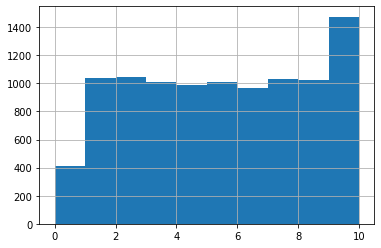

In [46]:
df.Tenure.hist()

In [47]:
df.Exited = df.Exited.astype('category')

In [48]:
df.Exited.describe()

count     10000
unique        2
top           0
freq       7963
Name: Exited, dtype: int64

In [50]:
len(df) - len(df[df.Exited == 0])

2037

In [51]:
df.Geography.describe()

count      10000
unique         3
top       France
freq        5014
Name: Geography, dtype: object

In [53]:
len(df[df.Balance == 0]) / len(df)

0.3617

In [54]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


In [55]:
import seaborn as sns

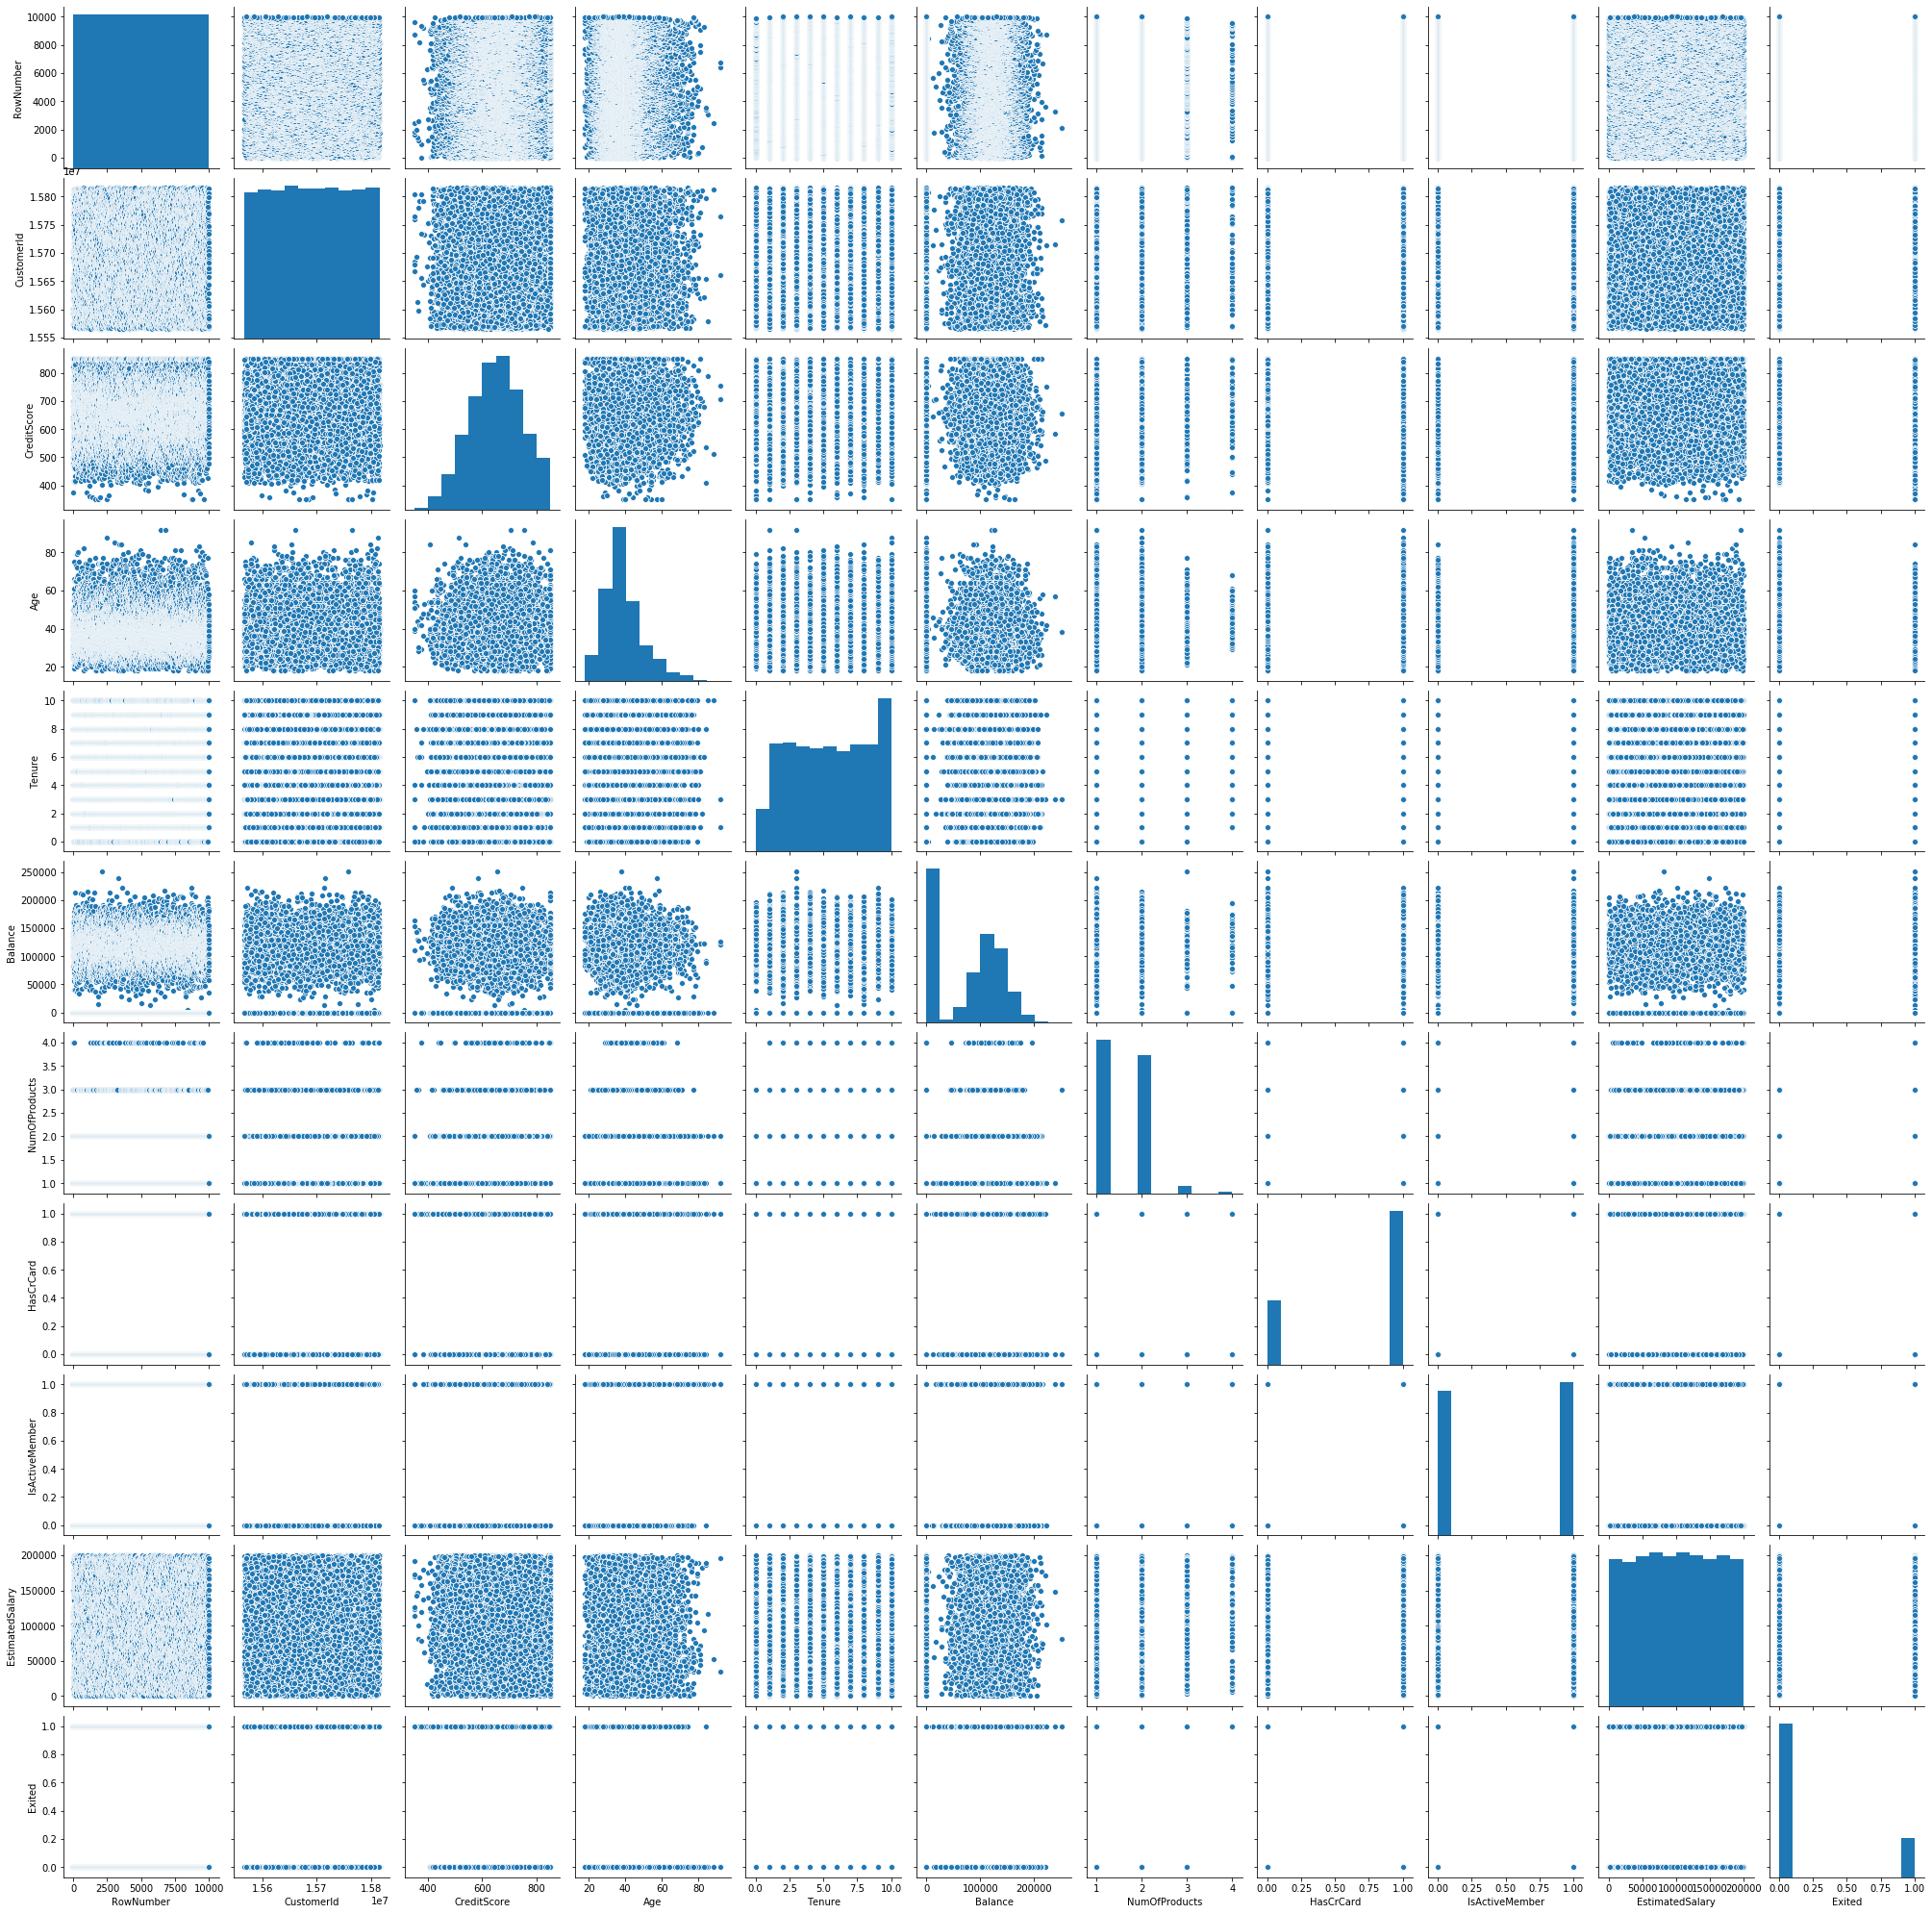

In [56]:
sns.pairplot(df)

## Предобработка данных

In [57]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [58]:
df.loc[ df['Gender'] == 'Male', 'Gender' ] = 0
df.loc[ df['Gender'] == 'Female', 'Gender' ] = 1

In [62]:
df.Gender = df.Gender.astype('int')

In [63]:
df.dtypes

RowNumber             int64
CustomerId            int64
Surname              object
CreditScore           int64
Geography            object
Gender                int32
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Exited             category
dtype: object

## Построение и тестирование модели

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [65]:
#X = df.loc[:, df.columns != 'Exited']
X = df[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df.Exited

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

In [67]:
clf=RandomForestClassifier(n_estimators=100, random_state=123)

In [69]:
%%time
clf.fit(X_train, y_train)

Wall time: 714 ms


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [70]:
y_pred=clf.predict(X_test)

In [72]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1_score:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.846
f1_score: 0.5285714285714287


In [74]:
X.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [77]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 2 (0.250547)
2. feature 8 (0.158287)
3. feature 0 (0.152363)
4. feature 4 (0.142373)
5. feature 5 (0.131493)
6. feature 3 (0.084684)
7. feature 7 (0.042237)
8. feature 6 (0.019571)
9. feature 1 (0.018446)


In [78]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=0)

In [79]:
%%time
logreg.fit(X_train, y_train)

Wall time: 124 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
y_pred=logreg.predict(X_test)

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("f1_score:", metrics.f1_score(y_test, y_pred))


Accuracy: 0.7896666666666666
f1_score: 0.08946608946608947
